A person is allowed to enter the house only if he/she is smiling. That's why, we would like to build a smile detector.

# 1. Importing libraries

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
#defining a function to load the train and the test
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)

# 2. Load the dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("../input/happy-dataset/train_happy.h5","../input/happy-dataset/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


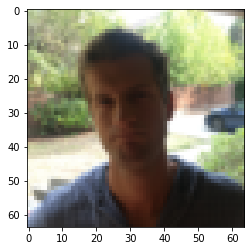

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# 3. Building Model

In [5]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = 5, padding='Same', input_shape = (64, 64, 3), activation = 'relu' ),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(filters =64, kernel_size = 5, padding='Same', activation = 'relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation = 'relu'),    
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

2022-04-12 22:05:03.076133: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [7]:
history_model = model.fit(X_train, Y_train, epochs=20, verbose=2,batch_size=30)

2022-04-12 22:05:03.437627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
20/20 - 3s - loss: 1.6333 - accuracy: 0.5667
Epoch 2/20
20/20 - 2s - loss: 0.4823 - accuracy: 0.7417
Epoch 3/20
20/20 - 2s - loss: 0.3928 - accuracy: 0.8183
Epoch 4/20
20/20 - 2s - loss: 0.3365 - accuracy: 0.8283
Epoch 5/20
20/20 - 2s - loss: 0.3222 - accuracy: 0.8617
Epoch 6/20
20/20 - 2s - loss: 0.3023 - accuracy: 0.8550
Epoch 7/20
20/20 - 2s - loss: 0.2882 - accuracy: 0.8683
Epoch 8/20
20/20 - 2s - loss: 0.2320 - accuracy: 0.8967
Epoch 9/20
20/20 - 2s - loss: 0.1848 - accuracy: 0.9117
Epoch 10/20
20/20 - 2s - loss: 0.1465 - accuracy: 0.9367
Epoch 11/20
20/20 - 2s - loss: 0.1761 - accuracy: 0.9217
Epoch 12/20
20/20 - 2s - loss: 0.1349 - accuracy: 0.9383
Epoch 13/20
20/20 - 3s - loss: 0.1080 - accuracy: 0.9683
Epoch 14/20
20/20 - 2s - loss: 0.1483 - accuracy: 0.9333
Epoch 15/20
20/20 - 2s - loss: 0.1189 - accuracy: 0.9433
Epoch 16/20
20/20 - 2s - loss: 0.0938 - accuracy: 0.9633
Epoch 17/20
20/20 - 2s - loss: 0.0816 - accuracy: 0.9633
Epoch 18/20
20/20 - 2s - loss: 0.0767 - 

# 4. Evaluate / Test

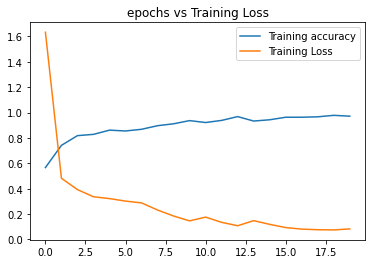

In [8]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [9]:
test_score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', test_score[0])
print('test accuracy:', test_score[1])

5/5 [==============================] - 0s 37ms/step - loss: 0.1142 - accuracy: 0.9533
test loss: 0.11424850672483444
test accuracy: 0.95333331823349


Confusion Matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

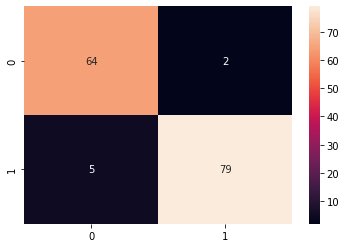

In [10]:
y_pred = model.predict(X_test)
y_pred_logical = (y_pred > 0.5).astype(np.int)
cm = confusion_matrix(Y_test, y_pred_logical)
sns.heatmap(cm, annot = True)

# 5. Displaying images with Predicted & expected labels (Happy-sad) (optmizer = Adam)

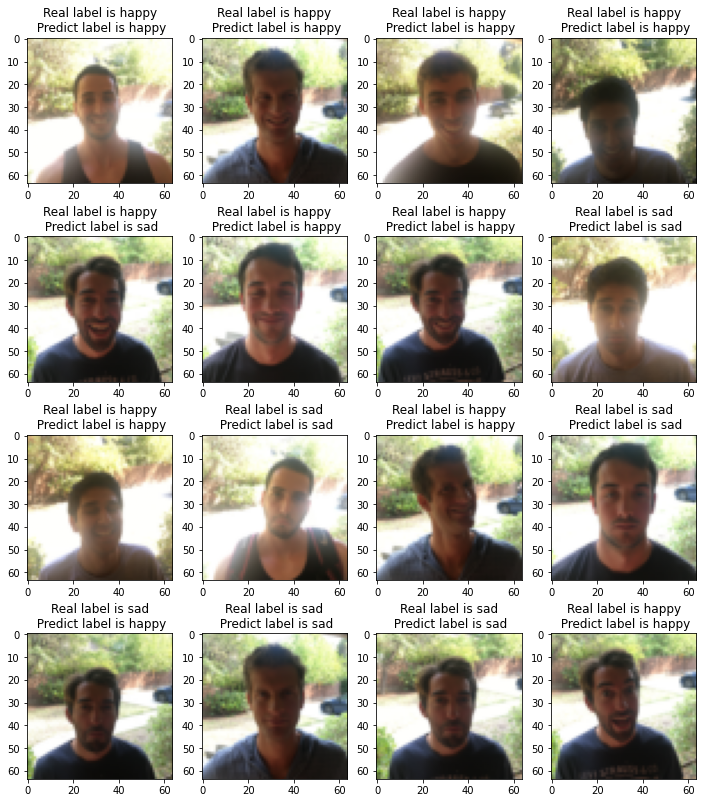

In [11]:
y_pred = model.predict(X_test)
lab = ['sad','happy']

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i], cmap='binary')
    ax.set_title(f"Real label is {lab[int(np.round(Y_test[i]))]}\n Predict label is {lab[int(np.round(y_pred[i]))]}");